- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [344]:
data = pd.read_csv('./adult.data')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [406]:
# changing column names
data.columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary'
]

# striping the string values in DataFrame object
def _strip(value):
    if type(value) is str:
        return value.strip()
    return value

data = data.applymap(_strip)
data.values

array([[50, 'Self-emp-not-inc', 83311, ..., 13, 'United-States', '<=50K'],
       [38, 'Private', 215646, ..., 40, 'United-States', '<=50K'],
       [53, 'Private', 234721, ..., 40, 'United-States', '<=50K'],
       ...,
       [58, 'Private', 151910, ..., 40, 'United-States', '<=50K'],
       [22, 'Private', 201490, ..., 20, 'United-States', '<=50K'],
       [52, 'Self-emp-inc', 287927, ..., 40, 'United-States', '>50K']],
      dtype=object)

In [409]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [213]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

**2. What is the average age (*age* feature) of women?**

In [595]:
data[data.sex == 'Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [515]:
german_citizens_count = data[data['native-country'] == 'Germany'].shape[0]
per = 100.0 * german_citizens_count / data.shape[0]

print(f'{per}%')

0.42076167076167076%


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [498]:
people_50k_educ = data[data['salary'] == '>50K']['education']
str_nums = ''.join(str(i) for i in range(10))

bool(set(str_nums) & set(people_50k_educ.unique()))

False

**7. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [499]:
max_hour = max(data['hours-per-week'])
max_hours_people = data[data['hours-per-week'] == max_hour]
per = max_hours_people[max_hours_people['salary'] == '>50K'].shape[0] * 100 / max_hours_people.shape[0]

print(f'{per}%')

29.41176470588235%


**8. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [596]:
japan_citizens = data[data['native-country'] == 'Japan']
small_salary = japan_citizens[japan_citizens['salary'] == '<=50K']
big_salary = japan_citizens[japan_citizens['salary'] == '>50K']
small_salary_avr_hours = small_salary['hours-per-week'].mean()
big_salary_avr_hours = big_salary['hours-per-week'].mean()

small_salary_avr_hours, big_salary_avr_hours

(41.0, 47.958333333333336)

**9. Plot distribution of age(histogram) in Japan, United States**

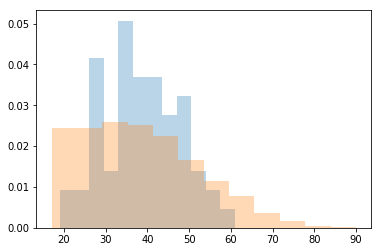

In [597]:
age_in_japan = data[data['native-country'] == 'Japan']['age']
age_in_usa = data[data['native-country'] == 'United-States']['age']

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=12)

plt.hist(age_in_japan.values, **kwargs)
plt.hist(age_in_usa.values, **kwargs)
plt.show()

**10. Plot hours-per-week vs age scatter plot**

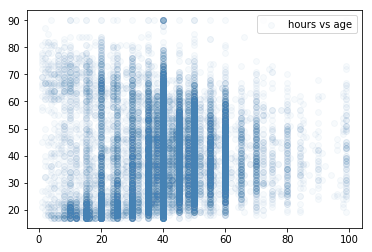

In [598]:
hours = data['hours-per-week'].values
ages = data['age'].values
plt.scatter(hours, ages, label='hours vs age', alpha=0.04, color='steelblue')
plt.legend()
plt.show()